### Problem Statement

XYZ company would like to know whether employee works for the company will stay with the company after the recent evaluation or not. Also would like to know what factors influence whether the employee stays or not.

XYZ company has provided the dataset with various features - ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']

## Tasks

Here's a high-level overview of the tasks
1. Review the dataset provided.
2. Perform data cleaning and preprocessing to ensure the accuracy and consistency of the data for further analysis.
3. Conduct exploratory data analysis to gain an initial understanding of the data and identify any significant trends or patterns.
4. Implement machine learning algorithms to detect potential outliers or anomalies within the claims data.
6. Develop and evaluate predictive models to predict whether the employee will stay with the organization or not.
7. Create interactive data visualizations to effectively communicate the results and insights of the data analysis.

## Importing necessary libraries

In [ ]:
# Code snippet 13
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [1]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
url = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/HR_comma_sep.csv'
df = pd.read_csv(url)


## Data Overview

In [3]:
df.shape

(14999, 10)

In [6]:
columns = df.columns.tolist()
print(columns)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [ ]:
df.describe
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


# Statistical Summary of the dataset

In [7]:
# Checking the statistical summary of the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [ ]:
import pycaret

# Data Preprocessing

## Setting up Environment in PyCaret

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
data = df.sample(frac=0.9, random_state=123)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (13499, 10)
Unseen Data For Predictions: (1500, 10)


In [ ]:
# Code snippet 4.1 - Setting numerical, categorical features
numericals=['average_montly_hours','last_evaluation','number_project','satisfaction_level','time_spend_company','Work_accident','promotion_last_5years']
categoricals=['Department','salary']
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13499 entries, 0 to 13498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     13499 non-null  float64
 1   last_evaluation        13499 non-null  float64
 2   number_project         13499 non-null  int64  
 3   average_montly_hours   13499 non-null  int64  
 4   time_spend_company     13499 non-null  int64  
 5   Work_accident          13499 non-null  int64  
 6   left                   13499 non-null  int64  
 7   promotion_last_5years  13499 non-null  int64  
 8   Department             13499 non-null  object 
 9   salary                 13499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.54,0.67,3,154,2,0,0,0,sales,high
1,0.72,0.52,3,143,4,1,0,0,support,low
2,0.95,0.61,3,267,2,0,0,0,RandD,low
3,0.78,0.79,3,203,2,0,0,0,sales,low
4,0.60,0.40,3,146,4,1,0,0,technical,low


In [ ]:
# experience1 = no preprocessing
exp1 = ClassificationExperiment()
exp1.setup(data,  target='left', session_id=555, train_size=0.7, preprocess=False, categorical_features= categoricals, numeric_features=numericals)

,Description,Value
0,Session id,555
1,Target,left
2,Target type,Binary
3,Original data shape,"(13499, 10)"
4,Transformed data shape,"(13499, 10)"
5,Transformed train set shape,"(9449, 10)"
6,Transformed test set shape,"(4050, 10)"
7,Numeric features,7
8,Categorical features,2


In [ ]:
# experiment 2, with preprocessing and more!!!
exp2 = ClassificationExperiment()
exp2.setup(data, target='left', session_id=555, train_size=0.7, categorical_features= categoricals, numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode' ,
           preprocess=True, normalize=True , transformation=True, remove_multicollinearity=True, multicollinearity_threshold=0.95,  remove_outliers=True)

,Description,Value
0,Session id,555
1,Target,left
2,Target type,Binary
3,Original data shape,"(13499, 10)"
4,Transformed data shape,"(13027, 21)"
5,Transformed train set shape,"(8977, 21)"
6,Transformed test set shape,"(4050, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


##Compare Models


In [ ]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9852,0.9937,0.9497,0.9875,0.9682,0.9585,0.9589,0.3430
dummy,Dummy Classifier,0.7624,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0220


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
top3_exp2 = exp2.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9875,0.9919,0.9555,0.9917,0.9732,0.9651,0.9654,1.6590
xgboost,Extreme Gradient Boosting,0.9853,0.9918,0.9572,0.9804,0.9687,0.9591,0.9592,0.9690
lightgbm,Light Gradient Boosting Machine,0.9852,0.9926,0.9510,0.9862,0.9682,0.9586,0.9589,1.3800
et,Extra Trees Classifier,0.9819,0.9907,0.9430,0.9802,0.9612,0.9494,0.9497,1.3850
gbc,Gradient Boosting Classifier,0.9761,0.9877,0.9318,0.9664,0.9487,0.9331,0.9335,1.5290
dt,Decision Tree Classifier,0.9700,0.9663,0.9590,0.9188,0.9384,0.9186,0.9191,0.8150
ada,Ada Boost Classifier,0.9571,0.9802,0.9033,0.9154,0.9092,0.8812,0.8813,1.0930
knn,K Neighbors Classifier,0.9362,0.9614,0.8815,0.8551,0.8677,0.8256,0.8262,0.9060
qda,Quadratic Discriminant Analysis,0.8567,0.9110,0.8365,0.6634,0.7373,0.6414,0.6518,0.5640
lr,Logistic Regression,0.7895,0.8446,0.4085,0.5803,0.4791,0.3524,0.3610,0.6600


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

**Create Model**
<BR>
This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [ ]:
lightgbm = exp1.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9873,0.9935,0.9600,0.9863,0.9730,0.9647,0.9648
1,0.9799,0.9939,0.9333,0.9813,0.9567,0.9436,0.9441
2,0.9915,0.9977,0.9689,0.9954,0.9820,0.9765,0.9766
3,0.9862,0.9880,0.9467,0.9953,0.9704,0.9614,0.9619
4,0.9873,0.9922,0.9644,0.9819,0.9731,0.9648,0.9649
5,0.9841,0.9967,0.9420,0.9906,0.9657,0.9554,0.9559
6,0.9831,0.9927,0.9464,0.9815,0.9636,0.9526,0.9529
7,0.9873,0.9975,0.9554,0.9907,0.9727,0.9645,0.9647
8,0.9852,0.9929,0.9554,0.9817,0.9683,0.9587,0.9588


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
tuned_lightgbm = exp1.tune_model(lightgbm, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9884,0.9930,0.9778,0.9735,0.9756,0.9680,0.9680
1,0.9831,0.9895,0.9467,0.9816,0.9638,0.9528,0.9530
2,0.9884,0.9965,0.9600,0.9908,0.9752,0.9676,0.9678
3,0.9884,0.9900,0.9556,0.9954,0.9751,0.9675,0.9678
4,0.9873,0.9925,0.9689,0.9776,0.9732,0.9649,0.9649
5,0.9915,0.9984,0.9688,0.9954,0.9819,0.9764,0.9765
6,0.9852,0.9920,0.9643,0.9730,0.9686,0.9589,0.9589
7,0.9852,0.9939,0.9598,0.9773,0.9685,0.9588,0.9589
8,0.9894,0.9895,0.9643,0.9908,0.9774,0.9705,0.9706


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=555, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0,
               n_estimators=90, n_jobs=-1, num_leaves=256, objective=None,
               random_state=555, reg_alpha=0.4, reg_lambda=4, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

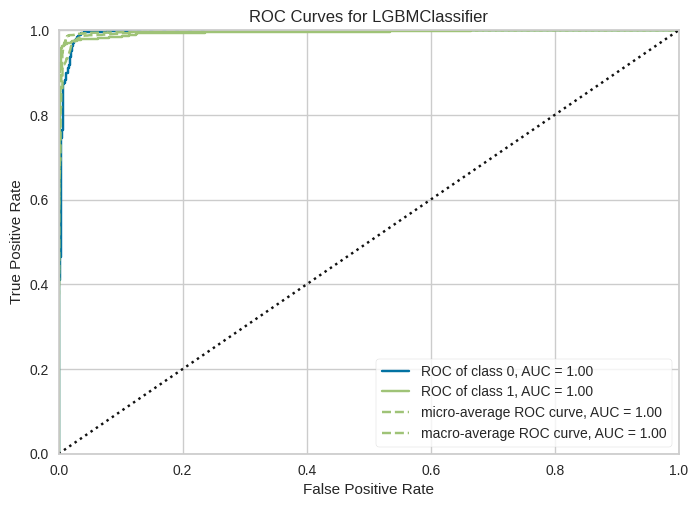

In [ ]:
exp1.plot_model(lightgbm, plot = 'auc')

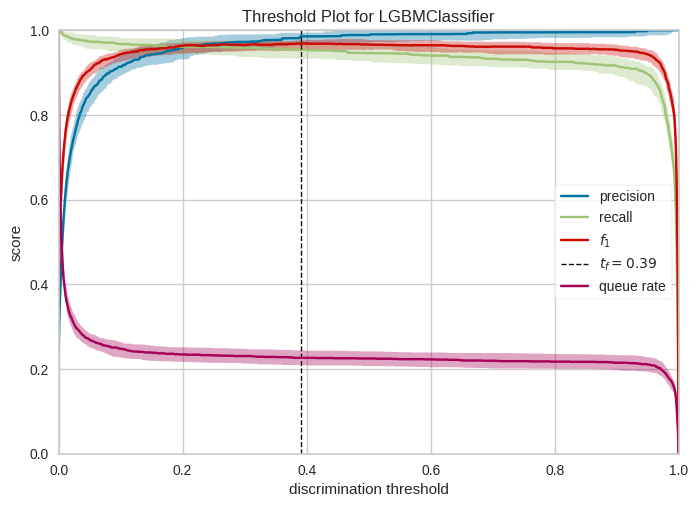

In [ ]:
exp1.plot_model(lightgbm, plot = 'threshold')

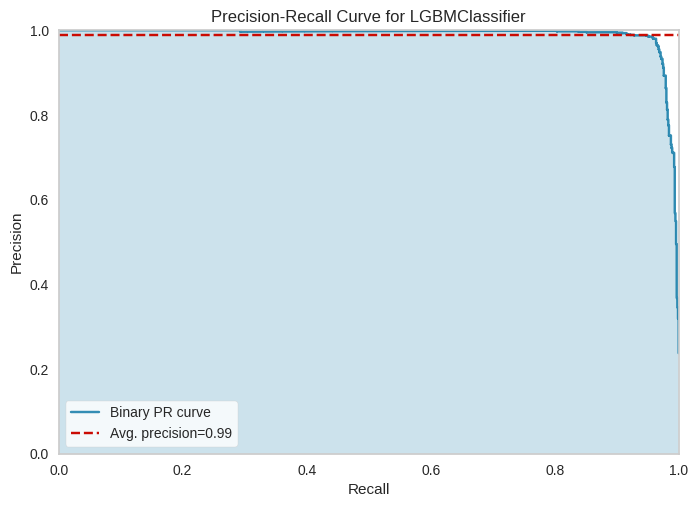

In [ ]:
exp1.plot_model(lightgbm, plot = 'pr')

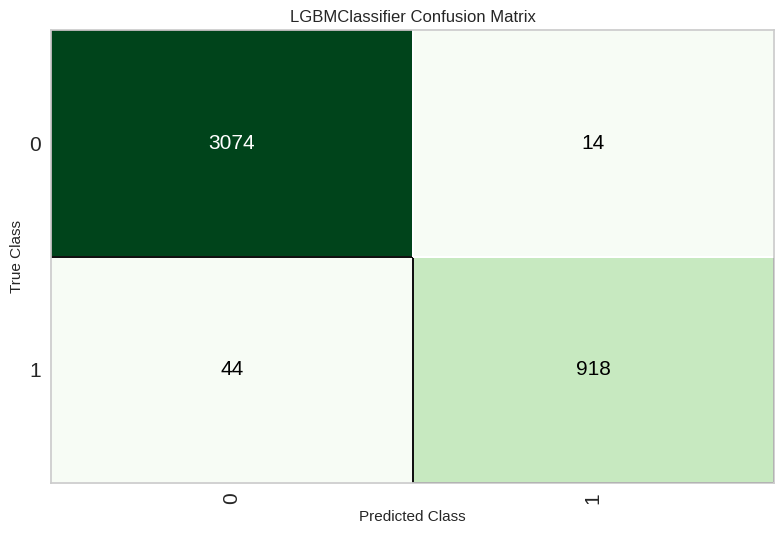

In [ ]:
exp1.plot_model(lightgbm, plot = 'confusion_matrix')

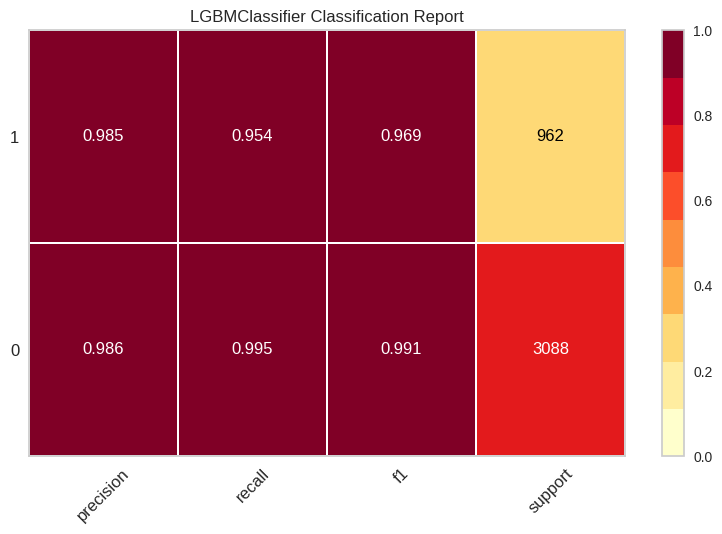

In [ ]:
exp1.plot_model(lightgbm, plot = 'class_report')

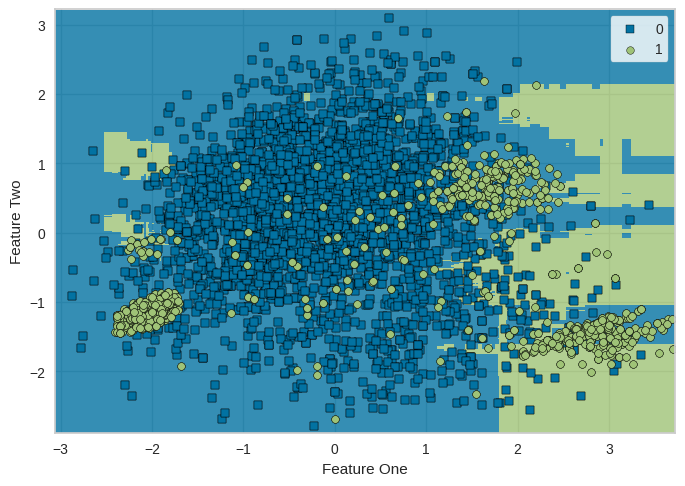

In [ ]:
exp1.plot_model(lightgbm, plot = 'boundary')

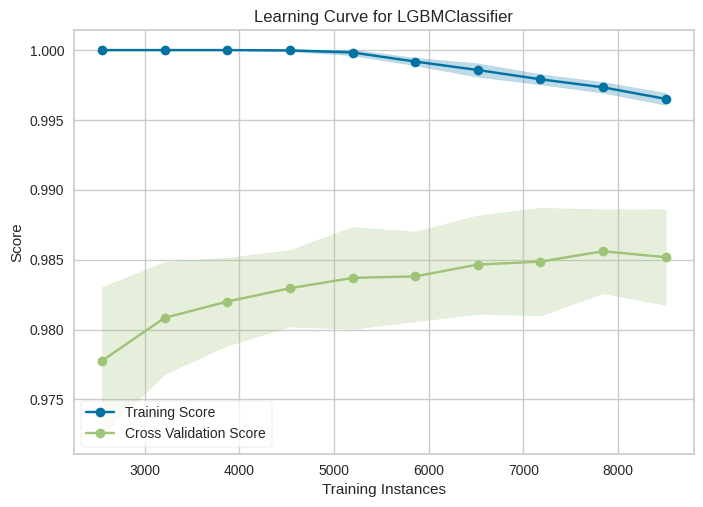

In [ ]:
exp1.plot_model(lightgbm, plot = 'learning')

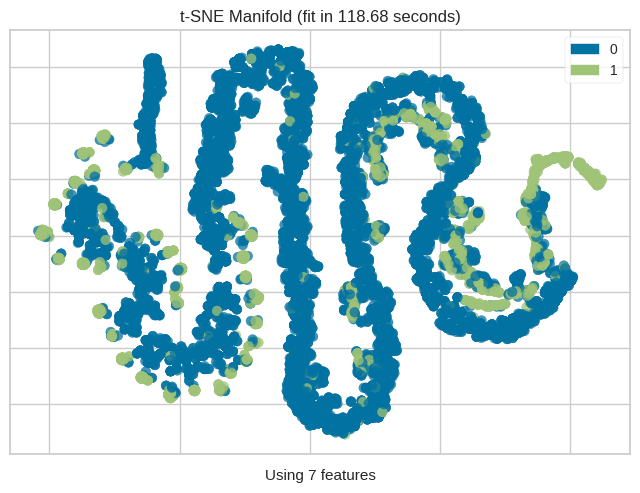

In [ ]:
exp1.plot_model(lightgbm, plot = 'manifold')

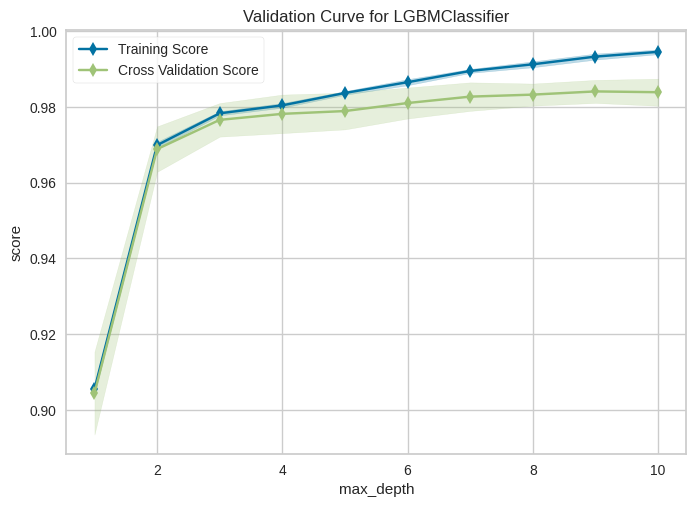

In [ ]:
exp1.plot_model(lightgbm, plot = 'vc')

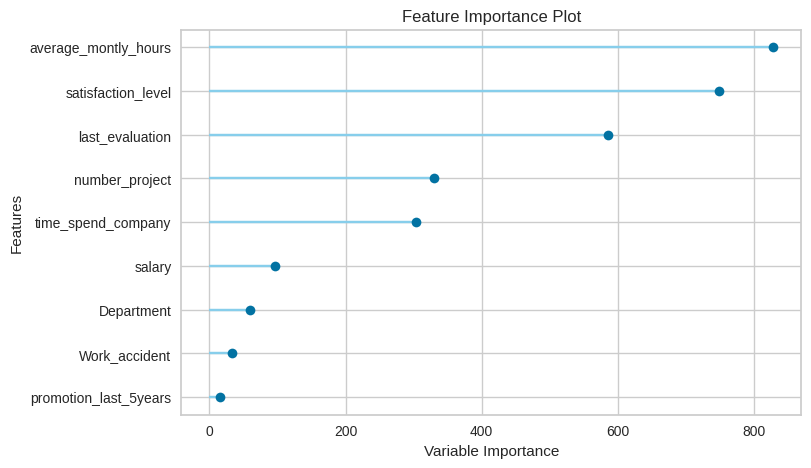

In [ ]:
exp1.plot_model(lightgbm, plot = 'feature')

**Model Calibration**

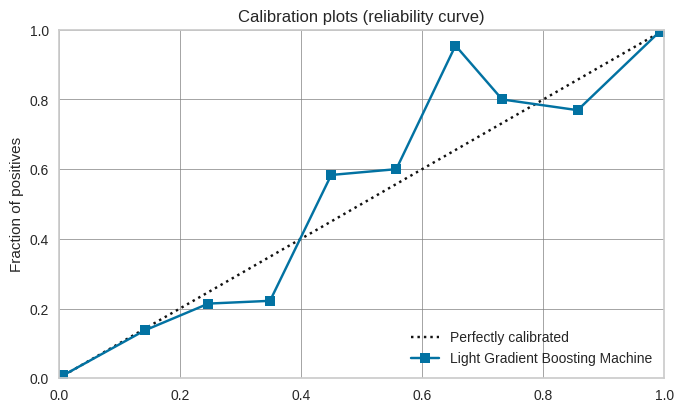

In [ ]:
exp1.plot_model(lightgbm, plot = 'calibration')

In [ ]:
calibrated_lgbm = exp1.calibrate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.9938,0.9644,0.9775,0.9709,0.9619,0.9619
1,0.9820,0.9926,0.9422,0.9815,0.9615,0.9497,0.9501
2,0.9905,0.9976,0.9644,0.9954,0.9797,0.9735,0.9737
3,0.9884,0.9895,0.9556,0.9954,0.9751,0.9675,0.9678
4,0.9884,0.9936,0.9644,0.9864,0.9753,0.9677,0.9678
5,0.9862,0.9972,0.9509,0.9907,0.9704,0.9614,0.9618
6,0.9862,0.9937,0.9554,0.9862,0.9705,0.9616,0.9618
7,0.9862,0.9971,0.9509,0.9907,0.9704,0.9614,0.9618
8,0.9862,0.9923,0.9598,0.9817,0.9707,0.9617,0.9618


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

**Evaluate Model**

In [ ]:
exp1.evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Interpret Model**

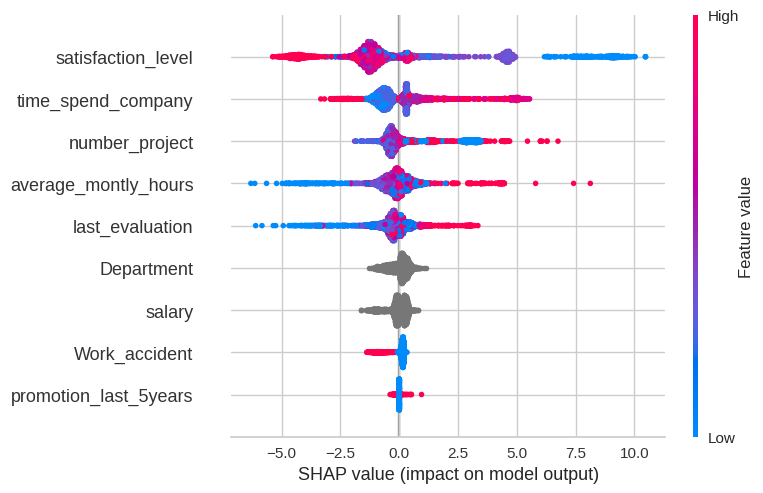

In [ ]:
exp1.interpret_model(lightgbm)

In [ ]:
lightgbm_predict = exp1.predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9857,0.9950,0.9543,0.9850,0.9694,0.9600,0.9602


In [ ]:
finalize_model = exp1.finalize_model(lightgbm)

In [ ]:
unseen_predictions = exp1.predict_model(finalize_model, data=data_unseen)
unseen_predictions.tail(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9887,0.9933,0.9643,0.9887,0.9764,0.9689,0.9690


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left,prediction_label,prediction_score
1490,0.83,0.85,5,237,5,0,0,marketing,medium,1,1,0.9706
1491,0.37,0.57,2,158,3,0,0,technical,low,1,1,0.9940
1492,0.39,0.68,2,282,5,0,0,marketing,low,1,1,0.7967
1493,0.39,0.54,2,154,3,0,0,marketing,low,1,1,0.9952
1494,0.37,0.49,2,148,3,0,0,sales,low,1,1,0.9948
1495,0.36,0.52,2,143,3,0,0,accounting,medium,1,1,0.9864
1496,0.76,0.89,5,238,5,0,0,technical,high,1,1,0.9511
1497,0.38,0.49,2,137,3,0,0,technical,medium,1,1,0.9958
1498,0.09,0.81,6,257,4,0,0,support,low,1,1,0.9996
1499,0.37,0.53,2,143,3,0,0,support,low,1,1,0.9953
